In [2]:
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
meta_df=pd.read_csv('/home/gbarchi/Documentos/Trust/OCEAN-TRUST/data/metadata/metadata_df+eth+gender.csv',index_col=0)

In [4]:
meta_df

,basename,extraversion,neuroticism,agreeableness,conscientiousness,openness,Partition,labels_mean,yamnet_no_music_20+speech_rate_>0.5,yamnet_no_music_20+speech_rate_>0.6,yamnet_no_music_20+speech_rate_>0.7,yamnet_no_music_20+speech_rate_>0.8,yamnet_no_music_20+speech_rate_>0.9,silero_speech_rate>0.5,silero_speech_rate>0.6,silero_speech_rate>0.7,silero_speech_rate>0.8,silero_speech_rate>0.9,ethnicity,gender
filename,,,,,,,,,,,,,,,,,,,,
mDRMCwSD3Ms.001.wav,mDRMCwSD3Ms,0.579439,0.697917,0.736264,0.766990,0.588889,Val,0.673900,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1
nUazOUcW_AM.002.wav,nUazOUcW_AM,0.476636,0.687500,0.582418,0.699029,0.711111,Val,0.631339,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,2
8AnIttmflwI.000.wav,8AnIttmflwI,0.532710,0.572917,0.637363,0.553398,0.511111,Val,0.561500,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2,1
XB81sertsYU.004.wav,XB81sertsYU,0.588785,0.510417,0.648352,0.466019,0.666667,Val,0.576048,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2,2
alucqviYJFE.005.wav,alucqviYJFE,0.514019,0.572917,0.527473,0.601942,0.688889,Val,0.581048,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SkNO4x-LSgE.001.wav,SkNO4x-LSgE,0.598131,0.635417,0.747253,0.582524,0.555556,Test,0.623776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1
QdafN9Y_j-Y.003.wav,QdafN9Y_j-Y,0.467290,0.406250,0.593407,0.514563,0.533333,Test,0.502969,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
JJs_HTelie4.000.wav,JJs_HTelie4,0.570093,0.760417,0.659341,0.601942,0.688889,Test,0.656136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2


Gender: Male=1, Female=2

In [5]:
dim_male=meta_df[meta_df.gender==1].shape[0]
dim_female=meta_df[meta_df.gender==2].shape[0]
print('Male samples:%d \nFemale samples:%d' % (dim_male, dim_female))

Male samples:4538 
Female samples:5462


In [6]:
meta_df.loc[meta_df.gender==1,'gender_tag']='Male'
meta_df.loc[meta_df.gender==2,'gender_tag']='Female'

Ethnicity: Asian=1,Caucasian=2,African-American=3

In [7]:
asian=meta_df[meta_df.ethnicity==1].shape[0]
caucasian=meta_df[meta_df.ethnicity==2].shape[0]
african_american=meta_df[meta_df.ethnicity==3].shape[0]
print('Asian:%d \nCaucasian:%d \nAfrican-American:%d' % (asian, caucasian,african_american))

meta_df.loc[meta_df.ethnicity==1,'ethnicity_tag']='Asian'
meta_df.loc[meta_df.ethnicity==2,'ethnicity_tag']='Caucasian'
meta_df.loc[meta_df.ethnicity==3,'ethnicity_tag']='African-American'

Asian:331 
Caucasian:8598 
African-American:1071


# Gender

Per-gender Mean of label means 

In [8]:
labels_mean=pd.DataFrame(meta_df.groupby('gender_tag')['labels_mean'].mean())
o=pd.DataFrame(meta_df.groupby('gender_tag')['openness'].mean())
c=pd.DataFrame(meta_df.groupby('gender_tag')['conscientiousness'].mean())
e=pd.DataFrame(meta_df.groupby('gender_tag')['extraversion'].mean())
a=pd.DataFrame(meta_df.groupby('gender_tag')['agreeableness'].mean())
n=pd.DataFrame(meta_df.groupby('gender_tag')['neuroticism'].mean())

In [9]:
to_merge_list=[o,c,e,a,n,labels_mean]

In [10]:
data_merge = reduce(lambda left, right:     # Merge DataFrames in list
                     pd.merge(left , right,
                              on = ['gender_tag'],
                              how = "outer"),
                     to_merge_list)
plot_data=pd.DataFrame(data_merge)      
plot_data=plot_data.melt(ignore_index=False).reset_index()
plot_data=plot_data.rename(columns={'variable':'Personality','value':'mean_value'})

Text(0, 0.5, 'mean label score')

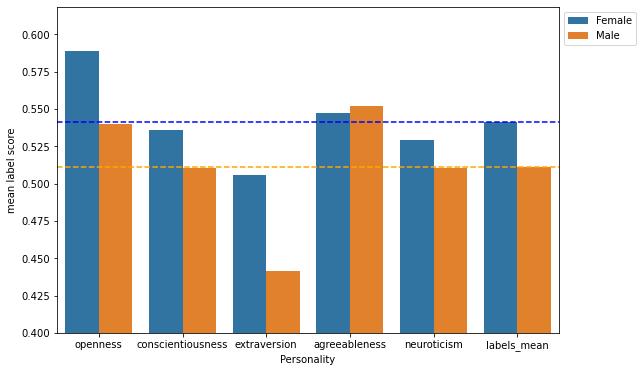

In [11]:
plt.figure(figsize=(9, 6))
plt.axhline(plot_data[(plot_data['gender_tag']=='Female') & (plot_data['Personality']=='labels_mean')]['mean_value'].values[0], ls='--',color='blue')
plt.axhline(plot_data[(plot_data['gender_tag']=='Male') & (plot_data['Personality']=='labels_mean')]['mean_value'].values[0], ls='--',color='orange')
sns.barplot(plot_data,x='Personality',y='mean_value',hue='gender_tag').set_ylim([0.4,None])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylabel('mean label score')


In [12]:
plot_data.T

,0,1,2,3,4,5,6,7,8,9,10,11
gender_tag,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female,Male
Personality,openness,openness,conscientiousness,conscientiousness,extraversion,extraversion,agreeableness,agreeableness,neuroticism,neuroticism,labels_mean,labels_mean
mean_value,0.589021,0.539761,0.535922,0.51025,0.505664,0.441697,0.547481,0.551821,0.529225,0.510733,0.541462,0.510852


In [13]:
plot_data.groupby('gender_tag')['mean_value']

# Ethnicity

In [14]:
eth_labels_mean=pd.DataFrame(meta_df.groupby('ethnicity_tag')['labels_mean'].mean())
eth_o=pd.DataFrame(meta_df.groupby('ethnicity_tag')['openness'].mean())
eth_c=pd.DataFrame(meta_df.groupby('ethnicity_tag')['conscientiousness'].mean())
eth_e=pd.DataFrame(meta_df.groupby('ethnicity_tag')['extraversion'].mean())
eth_a=pd.DataFrame(meta_df.groupby('ethnicity_tag')['agreeableness'].mean())
eth_n=pd.DataFrame(meta_df.groupby('ethnicity_tag')['neuroticism'].mean())

In [15]:
to_merge_list_eth=[eth_o,eth_c,eth_e,eth_a,eth_n,eth_labels_mean]

In [16]:
data_merge_eth = reduce(lambda left, right:     # Merge DataFrames in list
                     pd.merge(left , right,
                              on = ['ethnicity_tag'],
                              how = "outer"),
                     to_merge_list_eth)
plot_data_eth=pd.DataFrame(data_merge_eth)      
plot_data_eth=plot_data_eth.melt(ignore_index=False).reset_index()
plot_data_eth=plot_data_eth.rename(columns={'variable':'Personality','value':'mean_value'})

Text(0, 0.5, 'mean label score')

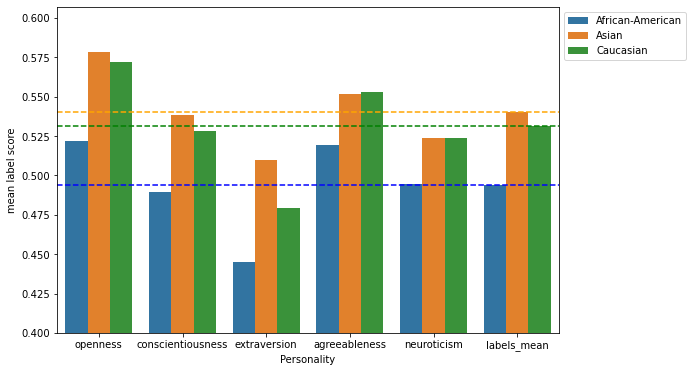

In [17]:
plt.figure(figsize=(9, 6))
plt.axhline(plot_data_eth[(plot_data_eth['ethnicity_tag']=='African-American') & (plot_data_eth['Personality']=='labels_mean')]['mean_value'].values[0], ls='--',color='blue')
plt.axhline(plot_data_eth[(plot_data_eth['ethnicity_tag']=='Asian') & (plot_data_eth['Personality']=='labels_mean')]['mean_value'].values[0], ls='--',color='orange')
plt.axhline(plot_data_eth[(plot_data_eth['ethnicity_tag']=='Caucasian') & (plot_data_eth['Personality']=='labels_mean')]['mean_value'].values[0], ls='--',color='green')
sns.barplot(plot_data_eth,x='Personality',y='mean_value',hue='ethnicity_tag').set_ylim([0.4,None])
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.ylabel('mean label score')

In [18]:
plot_data_eth.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
ethnicity_tag,African-American,Asian,Caucasian,African-American,Asian,Caucasian,African-American,Asian,Caucasian,African-American,Asian,Caucasian,African-American,Asian,Caucasian,African-American,Asian,Caucasian
Personality,openness,openness,openness,conscientiousness,conscientiousness,conscientiousness,extraversion,extraversion,extraversion,agreeableness,agreeableness,agreeableness,neuroticism,neuroticism,neuroticism,labels_mean,labels_mean,labels_mean
mean_value,0.521849,0.578248,0.571804,0.489707,0.538204,0.528041,0.444872,0.510094,0.479304,0.519582,0.551741,0.553083,0.494602,0.523477,0.523999,0.494122,0.540353,0.531246


# Final 

In [27]:
data_gender=plot_data[plot_data['Personality']!='labels_mean']
data_eth=plot_data_eth[plot_data_eth['Personality']!='labels_mean']

In [70]:
ocean_tags_eth=['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness','openness','ethnicity_tag']
ocean_tags_gender=['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness','openness','gender_tag']

In [68]:
df_eth=meta_df[ocean_tags_eth].rename(columns={'ethnicity_tag':'label'})

In [71]:
df_gender=meta_df[ocean_tags_gender].rename(columns={'gender_tag':'label'})

In [74]:
df=pd.concat([df_gender,df_eth])

In [80]:
df=df.reset_index().drop(columns='filename')

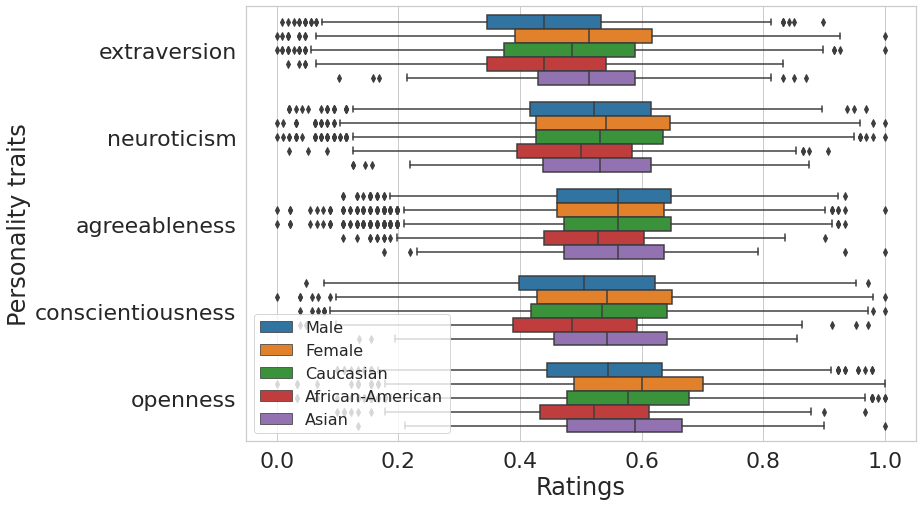

In [94]:
plt.figure(figsize=(12, 8))
sns.set(font_scale=2)
sns.set_palette('tab10')
sns.set_style("whitegrid")
sns.boxplot(df.melt(id_vars='label'),y='variable',x='value',hue='label')
plt.ylabel('Personality traits')
plt.xlabel('Ratings')
plt.legend(loc='lower left',fontsize=16)